# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

# Reading Data

In [2]:
df=pd.read_csv('seeds.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [5]:
df.shape

(199, 8)

# Finding NUll values

In [6]:
df.isnull()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

# Checking Type of data

In [8]:
nrow=df.shape[0]
ncol=df.shape[1]
if nrow//ncol>0 :
    print("given dataset is structured")
else :
     print("given dataset is not structured")

given dataset is structured


In [9]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [10]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [11]:
df.tail()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
198,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


# Univariate

In [12]:
df_type1=df.loc[df['Type']==1]
df_type2=df.loc[df['Type']==2]
df_type3=df.loc[df['Type']==3]

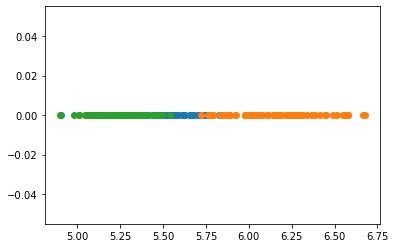

In [13]:
plt.plot(df_type1['Kernel.Length'],np.zeros_like(df_type1['Kernel.Length']),'o')
plt.plot(df_type2['Kernel.Length'],np.zeros_like(df_type2['Kernel.Length']),'o')
plt.plot(df_type3['Kernel.Length'],np.zeros_like(df_type3['Kernel.Length']),'o')

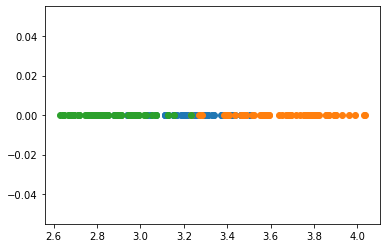

In [14]:
plt.plot(df_type1['Kernel.Width'],np.zeros_like(df_type1['Kernel.Width']),'o')
plt.plot(df_type2['Kernel.Width'],np.zeros_like(df_type2['Kernel.Width']),'o')
plt.plot(df_type3['Kernel.Width'],np.zeros_like(df_type3['Kernel.Width']),'o')

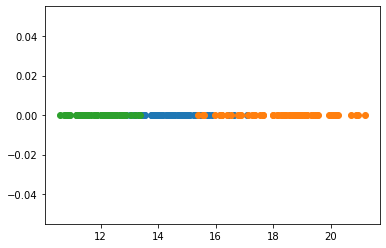

In [15]:
plt.plot(df_type1['Area'],np.zeros_like(df_type1['Area']),'o')
plt.plot(df_type2['Area'],np.zeros_like(df_type2['Area']),'o')
plt.plot(df_type3['Area'],np.zeros_like(df_type3['Area']),'o')

In [16]:
df['Kernel.Width'].unique()

array([3.312, 3.333, 3.337, 3.379, 3.562, 3.259, 3.465, 3.505, 3.242,
       3.201, 3.199, 3.156, 3.114, 3.383, 3.514, 3.466, 3.049, 3.129,
       3.168, 3.507, 2.936, 3.245, 3.421, 3.026, 2.956, 3.221, 3.065,
       2.975, 3.371, 3.186, 3.15 , 3.328, 3.464, 3.683, 3.288, 3.298,
       3.158, 3.396, 3.462, 3.155, 3.393, 3.377, 3.291, 3.258, 3.272,
       3.434, 3.113, 3.212, 3.412, 3.419, 3.032, 2.879, 3.042, 3.07 ,
       3.119, 3.19 , 2.882, 3.561, 3.484, 3.594, 3.93 , 3.486, 3.438,
       3.403, 3.814, 3.639, 3.566, 3.467, 3.857, 3.864, 3.772, 3.801,
       3.651, 3.764, 3.67 , 4.033, 4.032, 3.785, 3.796, 3.693, 3.86 ,
       3.485, 3.463, 3.81 , 3.552, 3.512, 3.684, 3.525, 3.694, 3.892,
       3.681, 3.755, 3.786, 3.573, 3.763, 3.674, 3.769, 3.791, 3.902,
       3.737, 3.991, 3.719, 3.897, 3.815, 3.962, 3.563, 3.387, 3.771,
       3.582, 3.869, 3.687, 3.773, 3.69 , 3.825, 3.268, 3.395, 3.408,
       3.574, 3.231, 3.286, 3.472, 2.994, 3.073, 3.074, 2.967, 2.777,
       2.687, 2.719,

In [17]:
df['Kernel.Length'].unique().sum()

1012.802

In [18]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

# Bivariate

C:\Users\gayathriboddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: 'NoneType' object is not callable

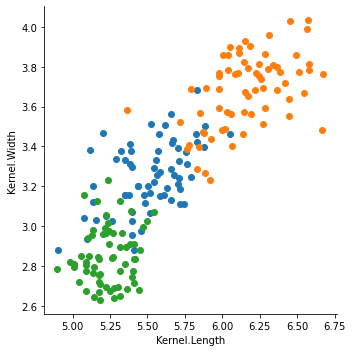

In [19]:
sns.FacetGrid(df,hue="Type",size=5).map(plt.scatter,"Kernel.Length","Kernel.Width").legend();
plt.show()

In [ ]:
ypos=np.arange(len(df['Type']))
ypos

In [ ]:
plt.figure(figsize= (20,10))
plt.xticks(ypos,df['Kernel.Width'])
plt.bar(ypos,df['Kernel.Width'])

In [ ]:
plt.figure(figsize= (30,8))
sns.set_style('whitegrid')
sns.countplot(df['Kernel.Length'], hue= df['Type'], palette= 'Reds')
plt.show()

In [ ]:
plt.figure(figsize= (30,8))
sns.set_style('whitegrid')
sns.countplot(df['Kernel.Width'], hue= df['Type'], palette= 'Blues')
plt.show()

In [ ]:
plt.figure(figsize= (30,8))
sns.set_style('whitegrid')
sns.countplot(df['Asymmetry.Coeff'], hue= df['Type'], palette= 'Greens')
plt.show()

# Multivariate

In [ ]:
sns.pairplot(df,hue="Type",size=3)

# Splitting data to x_train and test

In [22]:
X=df.drop('Type',axis=1)
y=df["Type"]

In [23]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape,X_test.shape


((139, 7), (60, 7))

In [24]:
y_train

130    2
182    3
180    3
19     1
152    3
      ..
67     2
192    3
117    2
47     1
172    3
Name: Type, Length: 139, dtype: int64

In [25]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Correlation

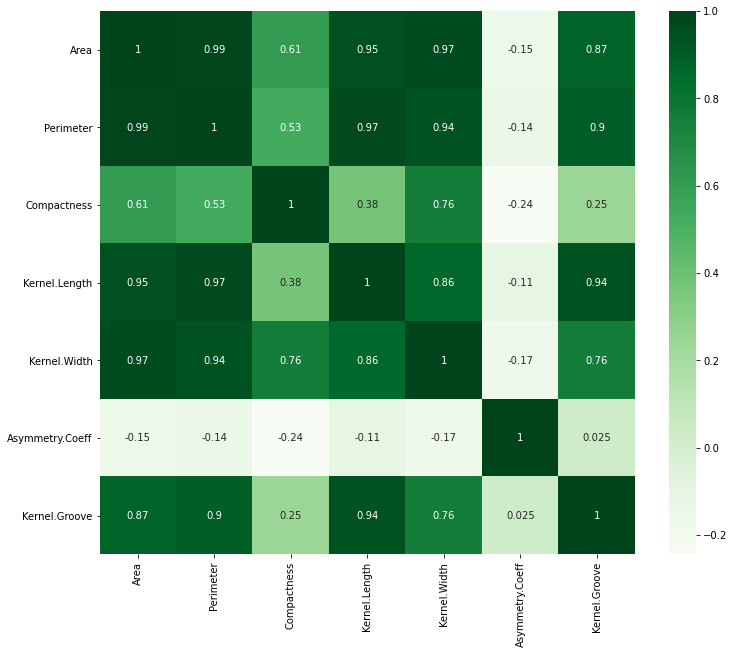

In [26]:
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

In [27]:
def correlation(df,min):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>min:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
x1f=X_train.drop(corr_features,axis=1)
x2f=X_test.drop(corr_features,axis=1)

# Final analysis of data after removing unwanted columns

In [ ]:
x1f

In [ ]:
plt.scatter(x1f['Area'],y_train,c="blue")

In [ ]:
plt.scatter(x1f['Compactness'],y_train,c="Green")

In [ ]:
plt.scatter(x1f['Asymmetry.Coeff'],y_train,c="red")

# Dummies

In [ ]:
dummies=pd.get_dummies(df.Type)
dummies

In [ ]:
merge=pd.concat([df,dummies],axis=1)
merge

In [ ]:
col=df.columns
col

# Skewness and Kurtosis

In [ ]:

 skew(df['Area'].dropna())

In [ ]:
kurtosis(df['Area'].dropna())